In [481]:
from tensorflow.keras.models import load_model
import keras
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# *Load model and set parameters*

In [482]:
model = load_model('/Users/wangfan/Documents/wukm/Uncertainty Projects/AI_Human/AH.keras')

X_test = np.load('/Users/wangfan/Documents/wukm/Uncertainty Projects/tweets/X_test_tweets.npy')
y_test = np.load('/Users/wangfan/Documents/wukm/Uncertainty Projects/tweets/y_test_tweets.npy')
num_observations = 100
num_classes = 2

In [483]:
#modify length to make it fit the model

#X_test_padded = np.pad(X_test, ((0, 0), (0, 13)), mode='constant', constant_values=0)

In [484]:
#print(X_test_padded.shape)

In [485]:
#max_values = np.max(X_test_padded, axis=0) * 1000000

In [486]:
#print(max_values.round().astype(np.int64))

In [487]:
#print(X_test_padded)

In [488]:
"""
scaling_factor = 1000000  # Choose an appropriate factor
X_test_scaled = (X_test_padded * scaling_factor).round().astype(np.int64)
X_test_scaled[:,5] = X_test_scaled[:,5] / 100
X_test_scaled[:,6] = X_test_scaled[:,6] / 100
X_test_scaled[:,8] = X_test_scaled[:,8] / 100
X_test_scaled[:,9] = X_test_scaled[:,9] / 10000000
X_test_scaled[:,10] = X_test_scaled[:,10] / 10
X_test_scaled[:,11] = X_test_scaled[:,11] / 10

"""

'\nscaling_factor = 1000000  # Choose an appropriate factor\nX_test_scaled = (X_test_padded * scaling_factor).round().astype(np.int64)\nX_test_scaled[:,5] = X_test_scaled[:,5] / 100\nX_test_scaled[:,6] = X_test_scaled[:,6] / 100\nX_test_scaled[:,8] = X_test_scaled[:,8] / 100\nX_test_scaled[:,9] = X_test_scaled[:,9] / 10000000\nX_test_scaled[:,10] = X_test_scaled[:,10] / 10\nX_test_scaled[:,11] = X_test_scaled[:,11] / 10\n\n'

In [489]:
#X_test_scaled.dtype

# *Monte-Carlo Dropout*

In [490]:
observations = []

for i in range(num_observations):
    print(i)
    keras.utils.set_random_seed(i)
    observations.append(model(X_test, training=True))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [491]:
observations = np.array(observations)
observations.shape

(100, 33583, 2)

In [492]:
observations_MC = np.mean(observations,axis = 0)
observations_MC.shape

(33583, 2)

**Special Case**

In [ ]:
#observations = np.load('/Users/wangfan/Documents/wukm/Uncertainty Projects/FIA/obs_FIA_t.npy')
#y_test = np.load('/Users/wangfan/Documents/wukm/Uncertainty Projects/FIA/y_test_FIA_t.npy')

In [ ]:
#observations.shape

(274, 12)

In [ ]:
#y_test.shape

(274,)

In [ ]:
#preds = np.argmax(observations,axis = 1)
#preds_MC = np.argmax(observations_MC,axis = 1)

#print(preds.shape)
#print(preds_MC.shape)

# *Predictions*

In [493]:
preds = np.argmax(observations[0,:,:],axis = 1)
preds_MC = np.argmax(observations_MC,axis = 1)

print(preds.shape)
print(preds_MC.shape)

(33583,)
(33583,)


# *Uncertainty Quantifications*

In [494]:
# Misclassification Probability
MP = []
for i in range(observations.shape[1]):
    MP.append(1-observations[0,i,preds[i]])
print(len(MP))

MP_MC = []
for i in range(observations.shape[1]):
    MP_MC.append(1-observations_MC[i,preds_MC[i]])
print(len(MP_MC))

33583
33583


In [495]:
# Information Entropy
Entropy = []
for i in range(observations.shape[1]):
  Entropy.append(-1*np.sum(observations[0,i,:]*np.log2(observations[0,i,:])))
print(len(Entropy))

Entropy_MC = []
for i in range(observations.shape[1]):
  Entropy_MC.append(-1*np.sum(observations_MC[i,:]*np.log2(observations_MC[i,:])))
print(len(Entropy_MC))

33583
33583


In [496]:
# Standard Deviation of the Predicted Probabilities of the Predicted Class
DPP = []
for i in range(observations.shape[1]):
    DPP.append(np.std(observations[:,i,preds_MC[i]]))
DPP = (DPP-np.min(DPP))/(np.max(DPP)-np.min(DPP))
len(DPP)

33583

In [497]:
# Modal Prediction

RC = np.argmax(observations[:,:,:],axis = 2)
m = stats.mode(RC)
pc = m.mode
    
n_min = num_observations/num_classes + 1
u_max = (num_observations-n_min) / num_observations
n_miss = 100 - m.count
MoP = n_miss / (num_observations*u_max)
MoP = MoP.tolist()
len(MoP)

33583

# *Uncertainty Predicts Accuracy*

In [498]:
T_F = []
T_F_MC = []

for i in range(observations.shape[1]):
    if(preds[i] == np.argmax(y_test[i])):
        T_F.append('T')
    else:
        T_F.append('F')
    if(preds_MC[i] == np.argmax(y_test[i])):
        T_F_MC.append('T')
    else:
        T_F_MC.append('F')

print(T_F)
print(T_F_MC)

['F', 'T', 'T', 'F', 'T', 'F', 'F', 'F', 'F', 'T', 'F', 'F', 'F', 'T', 'T', 'F', 'T', 'T', 'T', 'F', 'F', 'F', 'T', 'T', 'T', 'F', 'F', 'T', 'F', 'F', 'T', 'T', 'T', 'F', 'F', 'T', 'F', 'T', 'F', 'T', 'F', 'T', 'F', 'F', 'F', 'T', 'T', 'F', 'T', 'T', 'F', 'T', 'F', 'F', 'T', 'F', 'F', 'T', 'T', 'T', 'F', 'T', 'T', 'T', 'F', 'F', 'T', 'T', 'F', 'F', 'T', 'F', 'F', 'F', 'T', 'T', 'F', 'T', 'T', 'T', 'T', 'F', 'T', 'T', 'F', 'T', 'T', 'T', 'F', 'F', 'F', 'T', 'F', 'F', 'T', 'T', 'T', 'T', 'F', 'T', 'F', 'F', 'T', 'T', 'T', 'T', 'F', 'T', 'F', 'T', 'T', 'T', 'F', 'F', 'T', 'T', 'T', 'F', 'F', 'T', 'F', 'T', 'T', 'F', 'T', 'T', 'T', 'F', 'T', 'T', 'F', 'T', 'F', 'F', 'T', 'F', 'T', 'T', 'T', 'F', 'F', 'T', 'T', 'F', 'F', 'T', 'F', 'F', 'F', 'F', 'F', 'F', 'T', 'T', 'F', 'T', 'T', 'T', 'F', 'F', 'F', 'T', 'F', 'F', 'T', 'T', 'T', 'F', 'T', 'F', 'T', 'T', 'T', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'T', 'F', 'T', 'T', 'F', 'F', 'F', 'T', 'F', 'F', 'F', 'T', 'T', 'T', 'F', 'F', 'F', 'T', 'T', 'T',

In [499]:
def cal_bin(uc_list,T_F_list,slices,acc):
    temp_List = []
    u_List = []
    a = 0
    b = 1/slices

    for j in range(slices):

        for i in range(len(uc_list)):

            if a <= uc_list[i] <= b:
                temp_List.append(T_F_list[i])

        if acc:
            if(len(temp_List)==0):
                u_List.append(0)
            else:
                u_List.append(temp_List.count('T')/len(temp_List))
        else:
            u_List.append(len(temp_List))
        temp_List =[]

        a = a+1/slices
        b = b+1/slices

    print(u_List)
    return u_List

In [500]:
uList_MP = cal_bin(MP,T_F,10,True)
uList_MP_MC = cal_bin(MP_MC,T_F,10,True)
uList_Entropy = cal_bin(Entropy,T_F,10,True)
uList_Entropy_MC = cal_bin(Entropy_MC,T_F_MC,10,True)
uList_DPP = cal_bin(DPP,T_F_MC,10,True)
uList_MoP = cal_bin(MoP,T_F,10,True)

[0.485445401203993, 0.48954116059379216, 0.4837696335078534, 0.49028400597907323, 0.5146666666666667, 0, 0, 0, 0, 0]
[0.48116731859535006, 0.49402771141901575, 0.5057559478127398, 0.4995344506517691, 0.49947089947089945, 0, 0, 0, 0, 0]
[0.48311299041909755, 0.48334421946440237, 0.508893280632411, 0.48726322664924887, 0.4774980930587338, 0.5004291845493563, 0.4736394557823129, 0.5138169257340242, 0.4778761061946903, 0.4997756841633019]
[0.4865931306609273, 0.4664163537755528, 0.4639584605986561, 0.4967032967032967, 0.496410822749862, 0.49881516587677727, 0.47774294670846396, 0.512271869100063, 0.5031518624641834, 0.49740508057907673]
[0.4802846561614988, 0.477769210999743, 0.4851390220517737, 0.4817600601729974, 0.4878257155061939, 0.4995708154506438, 0.5010752688172043, 0.5024660912453761, 0.502283105022831, 0.5201793721973094]
[0.4803048467203288, 0.5080831408775982, 0.5034439574201628, 0.5004248088360238, 0.46435845213849286, 0.49211711711711714, 0.517406962785114, 0.5036390101892285

In [501]:
uList_MP_count = cal_bin(MP,T_F,10,False)
uList_MP_MC_count = cal_bin(MP_MC,T_F,10,False)
uList_Entropy_count = cal_bin(Entropy,T_F_MC,10,False)
uList_Entropy_MC_count = cal_bin(Entropy_MC,T_F_MC,10,False)
uList_DPP_count = cal_bin(DPP,T_F_MC,10,False)
uList_MoP_count = cal_bin(MoP,T_F,10,False)

[26246, 2964, 1910, 1338, 1125, 0, 0, 0, 0, 0]
[22753, 4186, 2606, 2148, 1890, 0, 0, 0, 0, 0]
[18683, 3062, 2024, 1531, 1311, 1165, 1176, 1158, 1243, 2229]
[11151, 4794, 3274, 2275, 1811, 1688, 1595, 1589, 1745, 3661]
[13771, 3891, 3129, 2659, 2341, 2330, 1860, 1622, 1533, 446]
[23356, 2598, 1597, 1177, 982, 888, 833, 687, 711, 562]


# *Plot* 

**All**

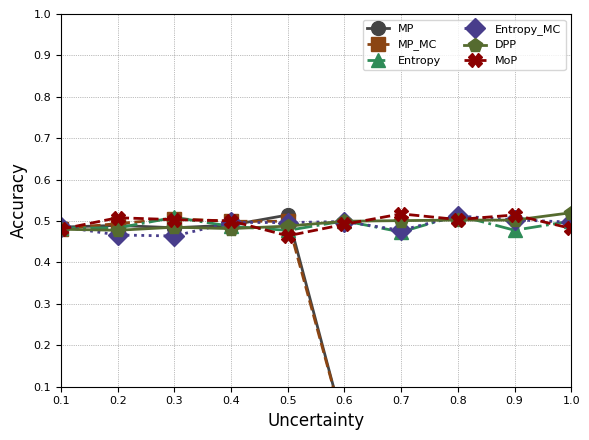

In [502]:
# Prepare the plot
x_values = np.arange(0.1, 1.1, 0.1)

plt.figure(figsize=(6, 4.5), dpi=100)
plt.xlabel('Uncertainty', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(np.arange(0, 1.1, 0.1), fontsize=8)
plt.yticks(np.arange(0, 1.1, 0.1), fontsize=8)
plt.ylim(0.1, 1)
plt.xlim(0.1, 1)
plt.grid(True, which='both', linestyle=':', linewidth=0.5, color='gray')

# Define a list of dark colors
dark_colors = ['#444444', '#8B4513', '#2E8B57', '#483D8B', '#556B2F', '#8B0000']

# Plot each line with a unique color, linestyle, and marker
line1, = plt.plot(x_values, uList_MP, color=dark_colors[0], linestyle='-', marker='o', markersize=10, linewidth=2, label='MP')
line2, = plt.plot(x_values, uList_MP_MC, color=dark_colors[1], linestyle='--', marker='s', markersize=10, linewidth=2, label='MP_MC')
line3, = plt.plot(x_values, uList_Entropy, color=dark_colors[2], linestyle='-.', marker='^', markersize=10, linewidth=2, label='Entropy')
line4, = plt.plot(x_values, uList_Entropy_MC, color=dark_colors[3], linestyle=':', marker='D', markersize=10, linewidth=2, label='Entropy_MC')
line5, = plt.plot(x_values, uList_DPP, color=dark_colors[4], linestyle='-', marker='p', markersize=10, linewidth=2, label='DPP')
line6, = plt.plot(x_values, uList_MoP, color=dark_colors[5], linestyle='--', marker='X', markersize=10, linewidth=2, label='MoP')

# Add a legend
plt.legend(handles=[line1, line2, line3, line4, line5, line6], loc='upper right', fontsize=8, ncol=2)

# Show the plot
plt.tight_layout()
plt.show()

**MP,Entropy,DPP**

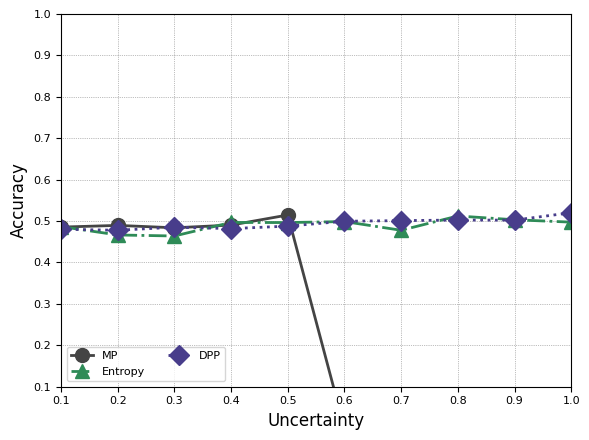

In [503]:
#ideal_line = np.arange(0.95, -0.05, -0.1)
x_values = np.arange(0.1, 1.1, 0.1)

plt.figure(figsize=(6, 4.5), dpi=100)
plt.xlabel('Uncertainty', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(np.arange(0, 1.1, 0.1), fontsize=8)
plt.yticks(np.arange(0, 1.1, 0.1), fontsize=8)
plt.ylim(0.1, 1)
plt.xlim(0.1, 1)
plt.grid(True, which='both', linestyle=':', linewidth=0.5, color='gray')

# Define a list of dark colors
dark_colors = ['#444444', '#8B4513', '#2E8B57', '#483D8B']

# Plot the data with different dark colors, line styles, and markers
line1, = plt.plot(x_values, uList_MP, color=dark_colors[0], linestyle='-', marker='o', markersize=10, linewidth=2, label='MP')
#line2, = plt.plot(x_values, uList_MP_MC, color=dark_colors[1], linestyle='--', marker='s', markersize=10, linewidth=2, label='MP_MC')
line3, = plt.plot(x_values, uList_Entropy_MC, color=dark_colors[2], linestyle='-.', marker='^', markersize=10, linewidth=2, label='Entropy')
line4, = plt.plot(x_values, uList_DPP, color=dark_colors[3], linestyle=':', marker='D', markersize=10, linewidth=2, label='DPP')


# Add a legend
plt.legend(handles=[line1, line3, line4], loc='lower left', fontsize=8, ncol=2)

# Show the plot
plt.tight_layout()
plt.show()

**All Counts**

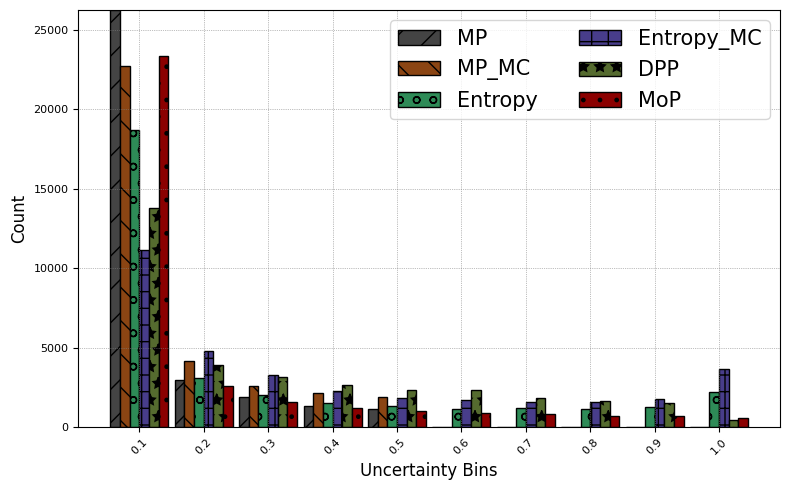

In [504]:
# Determine the maximum length and x values
max_length = len(uList_MP_count)
x_values = np.arange(0.1, 0.1 * max_length + 0.1, 0.1)
bar_width = 0.015  # Slightly wider bar width to space them out more

# Prepare the plot
plt.figure(figsize=(8, 5), dpi=100)
plt.xlabel('Uncertainty Bins', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(x_values, fontsize=8, rotation=45)  # Rotate x-axis labels for clarity
plt.yticks(fontsize=8)
plt.ylim(0, max(max(uList_MP_count), max(uList_DPP_count)) + 1)
#plt.xlim(0, max(x_values) + 0.2)  # Extend x-axis to make room on the sides
plt.grid(True, which='both', linestyle=':', linewidth=0.5, color='gray')

# Define a list of dark colors and hatch patterns for each bar
dark_colors = ['#444444', '#8B4513', '#2E8B57', '#483D8B', '#556B2F', '#8B0000']
hatches = ['/', '\\', 'o', '+', '*', '.']

# Plot each histogram with a unique color, hatch, and position, spread out for clarity
bar1 = plt.bar(x_values - 2.5 * bar_width, uList_MP_count, width=bar_width, color=dark_colors[0], hatch=hatches[0], label='MP', edgecolor='black')
bar2 = plt.bar(x_values - 1.5 * bar_width, uList_MP_MC_count, width=bar_width, color=dark_colors[1], hatch=hatches[1], label='MP_MC', edgecolor='black')
bar3 = plt.bar(x_values - 0.5 * bar_width, uList_Entropy_count, width=bar_width, color=dark_colors[2], hatch=hatches[2], label='Entropy', edgecolor='black')
bar4 = plt.bar(x_values + 0.5 * bar_width, uList_Entropy_MC_count, width=bar_width, color=dark_colors[3], hatch=hatches[3], label='Entropy_MC', edgecolor='black')
bar5 = plt.bar(x_values + 1.5 * bar_width, uList_DPP_count, width=bar_width, color=dark_colors[4], hatch=hatches[4], label='DPP', edgecolor='black')
bar6 = plt.bar(x_values + 2.5 * bar_width, uList_MoP_count, width=bar_width, color=dark_colors[5], hatch=hatches[5], label='MoP', edgecolor='black')

# Add a legend with more space to improve readability
plt.legend(handles=[bar1, bar2, bar3, bar4, bar5, bar6], loc='upper right', fontsize=15, ncol=2)

# Adjust layout to avoid clipping and overlap
plt.tight_layout()

# Show the plot
plt.show()

**All Counts Zoom In**

In [505]:
uList_MP_count = uList_MP_count[1:]
uList_MP_MC_count = uList_MP_MC_count[1:]
uList_Entropy_count = uList_Entropy_count[1:]
uList_Entropy_MC_count = uList_Entropy_MC_count[1:]
uList_DPP_count = uList_DPP_count[1:]
uList_MoP_count = uList_MoP_count[1:]

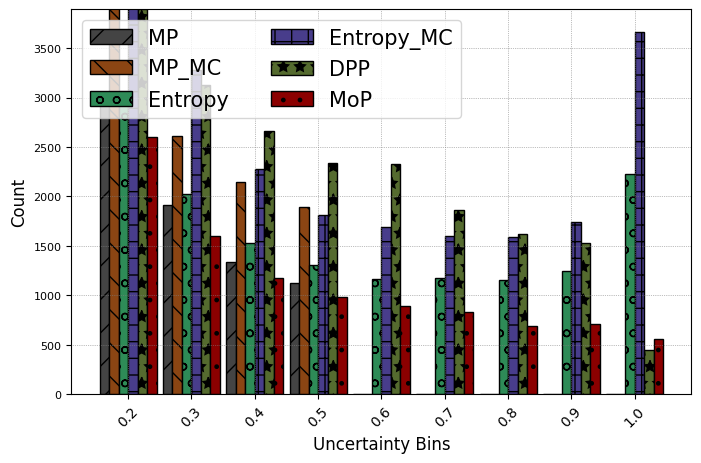

In [506]:
# Determine the maximum length and x values
max_length = len(uList_MP_count)
x_values = np.arange(0.2, 1.1, 0.1)
bar_width = 0.015  # Slightly wider bar width to space them out more

# Prepare the plot
plt.figure(figsize=(8, 5), dpi=100)
plt.xlabel('Uncertainty Bins', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(x_values, fontsize=10, rotation=45)  # Rotate x-axis labels for clarity
plt.yticks(fontsize=8)
plt.ylim(0, max(max(uList_MP_count), max(uList_DPP_count)) + 1)
#plt.xlim(0, max(x_values) + 0.2)  # Extend x-axis to make room on the sides
plt.grid(True, which='both', linestyle=':', linewidth=0.5, color='gray')

# Define a list of dark colors and hatch patterns for each bar
dark_colors = ['#444444', '#8B4513', '#2E8B57', '#483D8B', '#556B2F', '#8B0000']
hatches = ['/', '\\', 'o', '+', '*', '.']

# Plot each histogram with a unique color, hatch, and position, spread out for clarity
bar1 = plt.bar(x_values - 2.5 * bar_width, uList_MP_count, width=bar_width, color=dark_colors[0], hatch=hatches[0], label='MP', edgecolor='black')
bar2 = plt.bar(x_values - 1.5 * bar_width, uList_MP_MC_count, width=bar_width, color=dark_colors[1], hatch=hatches[1], label='MP_MC', edgecolor='black')
bar3 = plt.bar(x_values - 0.5 * bar_width, uList_Entropy_count, width=bar_width, color=dark_colors[2], hatch=hatches[2], label='Entropy', edgecolor='black')
bar4 = plt.bar(x_values + 0.5 * bar_width, uList_Entropy_MC_count, width=bar_width, color=dark_colors[3], hatch=hatches[3], label='Entropy_MC', edgecolor='black')
bar5 = plt.bar(x_values + 1.5 * bar_width, uList_DPP_count, width=bar_width, color=dark_colors[4], hatch=hatches[4], label='DPP', edgecolor='black')
bar6 = plt.bar(x_values + 2.5 * bar_width, uList_MoP_count, width=bar_width, color=dark_colors[5], hatch=hatches[5], label='MoP', edgecolor='black')

# Add a legend with more space to improve readability
plt.legend(handles=[bar1, bar2, bar3, bar4, bar5, bar6], loc='upper left', fontsize=15, ncol=2)

# Show the plot
plt.show()

**MP,Entropy,DPP Counts**

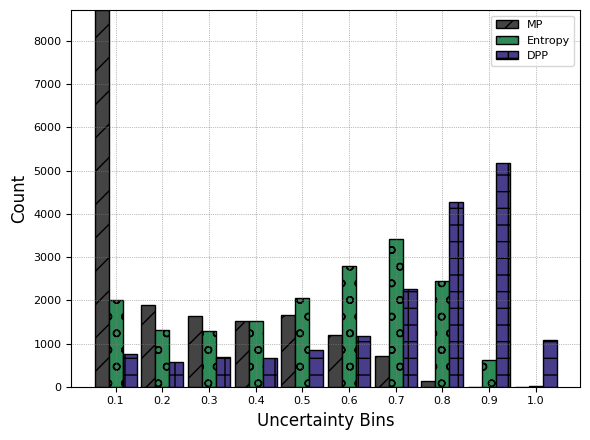

In [233]:
# Determine the maximum length
max_length = len(uList_MP)

# Generate x values based on the maximum length, each interval is 0.1
x_values = np.arange(0.1, 0.1 * max_length + 0.1, 0.1)

bar_width = 0.03  # Set the width of each bar

plt.figure(figsize=(6, 4.5), dpi=100)
plt.xlabel('Uncertainty Bins', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(x_values, fontsize=8)  # Set x-axis tick size to match previous plot style
plt.yticks(fontsize=8)  # Set y-axis tick size to match previous plot style
plt.ylim(0, max(max(uList_MP_count), max(uList_DPP_count)) + 1)  # Set y-axis range
plt.grid(True, which='both', linestyle=':', linewidth=0.5, color='gray')

# Define a list of darker colors with higher contrast
dark_colors = ['#444444', '#8B4513', '#2E8B57', '#483D8B']  # Dark gray, saddle brown, sea green, dark slate blue
hatches = ['/', '\\', 'o', '+']  # Distinct hatch patterns for easy recognition

# Plot the histograms with hatch patterns for better visibility in black and white
bar1 = plt.bar(x_values - 1 * bar_width, uList_MP_count, width=bar_width, color=dark_colors[0], hatch=hatches[0], label='MP', edgecolor='black')
#bar2 = plt.bar(x_values - 0.5 * bar_width, uList_MP_MC_count, width=bar_width, color=dark_colors[1], hatch=hatches[1], label='MP_MC', edgecolor='black')
bar3 = plt.bar(x_values, uList_Entropy_MC_count, width=bar_width, color=dark_colors[2], hatch=hatches[2], label='Entropy', edgecolor='black')
bar4 = plt.bar(x_values + 1 * bar_width, uList_DPP_count, width=bar_width, color=dark_colors[3], hatch=hatches[3], label='DPP', edgecolor='black')

# Add a legend
plt.legend(handles=[bar1, bar3, bar4], loc='upper right', fontsize=8)

# Adjust layout to avoid clipping
plt.tight_layout()

# Show the plot
plt.show()

In [234]:
#Zoom in
uList_MP_count = uList_MP_count[1:]
uList_Entropy_MC_count = uList_Entropy_MC_count[1:]
uList_DPP_count = uList_DPP_count[1:]

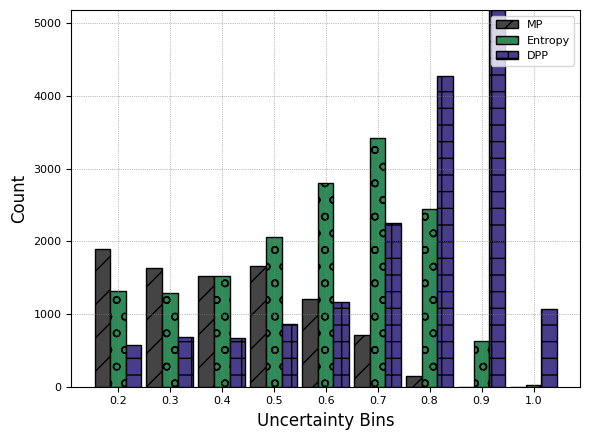

In [235]:


# Determine the maximum length
max_length = len(uList_MP)

# Generate x values based on the maximum length, each interval is 0.1
x_values = np.arange(0.2, 0.1 * max_length + 0.1, 0.1)

bar_width = 0.03  # Set the width of each bar

plt.figure(figsize=(6, 4.5), dpi=100)
plt.xlabel('Uncertainty Bins', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(x_values, fontsize=8)  # Set x-axis tick size to match previous plot style
plt.yticks(fontsize=8)  # Set y-axis tick size to match previous plot style
plt.ylim(0, max(max(uList_MP_count), max(uList_DPP_count)) + 1)  # Set y-axis range
plt.grid(True, which='both', linestyle=':', linewidth=0.5, color='gray')

# Define a list of darker colors with higher contrast
dark_colors = ['#444444', '#8B4513', '#2E8B57', '#483D8B']  # Dark gray, saddle brown, sea green, dark slate blue
hatches = ['/', '\\', 'o', '+']  # Distinct hatch patterns for easy recognition

# Plot the histograms with hatch patterns for better visibility in black and white
bar1 = plt.bar(x_values - 1 * bar_width, uList_MP_count, width=bar_width, color=dark_colors[0], hatch=hatches[0], label='MP', edgecolor='black')
#bar2 = plt.bar(x_values - 0.5 * bar_width, uList_MP_MC_count, width=bar_width, color=dark_colors[1], hatch=hatches[1], label='MP_MC', edgecolor='black')
bar3 = plt.bar(x_values, uList_Entropy_MC_count, width=bar_width, color=dark_colors[2], hatch=hatches[2], label='Entropy', edgecolor='black')
bar4 = plt.bar(x_values + 1 * bar_width, uList_DPP_count, width=bar_width, color=dark_colors[3], hatch=hatches[3], label='DPP', edgecolor='black')

# Add a legend
plt.legend(handles=[bar1, bar3, bar4], loc='upper right', fontsize=8)

# Adjust layout to avoid clipping
plt.tight_layout()

# Show the plot
plt.show()

# *Count Difference*

In [207]:
# MP vs. Entropy
diff = []
for i in range(8):
    diff.append(uList_Entropy_MC[i] - uList_MP[i])
print(diff)
print("Average Diff for Entropy:",np.mean(diff))
print("Average Diff for Entropy in low uncertainties:",np.mean(diff[:2]))
print("Maximum Diff for Entropy:",max(diff))

[0.015318605879246716, 0.12708583302211385, 0.13758206328464606, 0.10714325232459077, 0.12679911470761152, 0.13088775530249946, 0.20222195817490496, 0.04465004022526148]
Average Diff for Entropy: 0.11146107786510935
Average Diff for Entropy in low uncertainties: 0.07120221945068028
Maximum Diff for Entropy: 0.20222195817490496


In [208]:
# MP vs. DPP
diff = []
for i in range(8):
    diff.append(uList_DPP[i] - uList_MP[i])
print(diff)
print("Average Diff for DPP:",np.mean(diff))
print("Average Diff for DPP in low uncertainties:",np.mean(diff[:2]))
print("Maximum Diff for DPP:",max(diff))

[0.016296785629770882, 0.13990407856906595, 0.1695604524683565, 0.18926507175821883, 0.23354198760369438, 0.24070123450718078, 0.38424718929971236, 0.384040404040404]
Average Diff for DPP: 0.21969465048455045
Average Diff for DPP in low uncertainties: 0.07810043209941842
Maximum Diff for DPP: 0.38424718929971236


0.2265650661 + 0.1272215395 + 0.1114610779 + 0.2196946505

In [213]:
(0.2265650661 + 0.1272215395 + 0.1114610779 + 0.2196946505)/4

0.17123558349999998